In [2]:
import datetime

import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

In [3]:
def read_data(input_file, index):
    # Read the data from the input file
    input_data = np.loadtxt(input_file, delimiter=',')

    # Lambda function to convert strings to Pandas date format
    to_date = lambda x, y: str(int(x)) + '-' + str(int(y))

    # Extract the start date
    start = to_date(input_data[0, 0], input_data[0, 1])

    # Extract the end date
    if input_data[-1, 1] == 12:
        year = input_data[-1, 0] + 1
        month = 1
    else:
        year = input_data[-1, 0]
        month = input_data[-1, 1] + 1

    end = to_date(year, month)

    # Create a date list with a monthly frequency
    date_indices = pd.date_range(start, end, freq='ME')

    # Add timestamps to the input data to create time-series data
    output = pd.Series(input_data[:, index], index=date_indices)

    return output 

In [4]:
data = np.loadtxt('data_1D.txt', delimiter=',')

In [5]:
data

array([[1.800e+03, 1.000e+00, 3.000e-02],
       [1.800e+03, 2.000e+00, 2.000e-02],
       [1.800e+03, 3.000e+00, 1.900e-01],
       ...,
       [2.016e+03, 1.000e+01, 6.130e+00],
       [2.016e+03, 1.100e+01, 6.050e+00],
       [2.016e+03, 1.200e+01, 6.170e+00]])

In [6]:
X = np.column_stack([data[:, 2]])

In [8]:
num_components = 5
hmm = GaussianHMM(n_components=num_components, 
        covariance_type='diag', n_iter=1000)

In [9]:
hmm.fit(X)

Model is not converging.  Current: -5133.617102715447 is not greater than -3173.9970395937444. Delta is -1959.6200631217025


GaussianHMM(n_components=5, n_iter=1000)

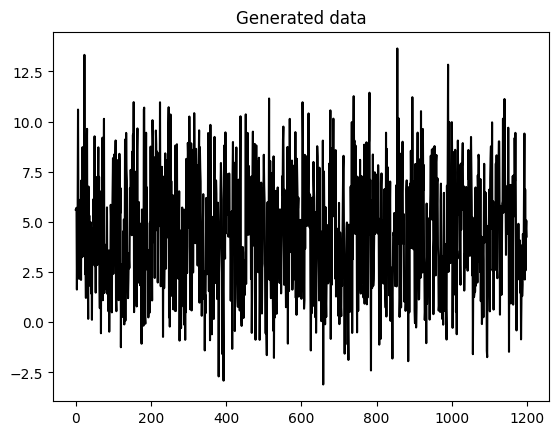

In [10]:
num_samples = 1200
generated_data, _ = hmm.sample(num_samples) 
plt.plot(np.arange(num_samples), generated_data[:, 0], c='black')
plt.title('Generated data')

plt.show()